# Atividade prática: Algoritmo k-Nearest Neighbors (KNN)

Objetivo da atividade:
* Compreender o processo de classificação através do algoritmo KNN
* Analisar o efeito de aspectos como normalização de dados e dimensão do
vetor de atributos sobre a saída prevista pelo classificador


In [79]:
# Dataset paths 
TRAIN_2F_NORM = "../Dados_Normalizados_2Features/TrainingData_2F_Norm.txt"
TEST_2F_NORM = "../Dados_Normalizados_2Features/TestingData_2F_Norm.txt"

TRAIN_11F_NORM = "../Dados_Normalizados_11Features/TrainingData_11F_Norm.txt"
TEST_11F_NORM = "../Dados_Normalizados_11Features/TestingData_11F_Norm.txt"

TRAIN_2F_ORI = "../Dados_Originais_2Features/TrainingData_2F_Original.txt"
TEST_2F_ORI = "../Dados_Originais_2Features/TestingData_2F_Original.txt"

TRAIN_11F_ORI = "../Dados_Originais_11Features/TrainingData_11F_Original.txt"
TEST_11F_ORI = "../Dados_Originais_11Features/TestingData_11F_Original.txt"

In [80]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

K_NEIGHBORS = 5

### Treinamento e avaliação dos dados originais com 2 features

In [81]:
# Load the data from file
training_data = np.genfromtxt(TRAIN_2F_ORI, delimiter='\t', skip_header=1, usecols=(0,1,2,3))
test_data = np.genfromtxt(TEST_2F_ORI, delimiter='\t', skip_header=1, usecols=(0,1,2,3))

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]    

print("DADOS NORMALIZADOS: 2 FEATURES")
for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS NORMALIZADOS: 2 FEATURES
 Accuracy for k = 1: 0.75
 Accuracy for k = 3: 0.5
 Accuracy for k = 5: 0.25
 Accuracy for k = 7: 0.25


#### Encontrar os 5 vizinhos mais próximos

In [82]:
# Discover the k closest neighbors

for i, point in enumerate(X_test):
    print(f"Point: N{i+1}")
    distances, kneighbors = knn.kneighbors([point], K_NEIGHBORS, True)
    for d, n in zip(distances[0], kneighbors[0]):
        print(f"Neighbor: T{n+1} - Distance: {d.round(3)}")

Point: N1
Neighbor: T21 - Distance: 0.4
Neighbor: T27 - Distance: 1.0
Neighbor: T30 - Distance: 1.114
Neighbor: T25 - Distance: 2.014
Neighbor: T11 - Distance: 4.0
Point: N2
Neighbor: T10 - Distance: 1.059
Neighbor: T37 - Distance: 2.001
Neighbor: T4 - Distance: 5.508
Neighbor: T36 - Distance: 6.003
Neighbor: T31 - Distance: 9.0
Point: N3
Neighbor: T29 - Distance: 0.01
Neighbor: T28 - Distance: 1.0
Neighbor: T15 - Distance: 2.057
Neighbor: T41 - Distance: 3.0
Neighbor: T35 - Distance: 4.001
Point: N4
Neighbor: T9 - Distance: 1.085
Neighbor: T26 - Distance: 2.011
Neighbor: T16 - Distance: 2.088
Neighbor: T11 - Distance: 2.106
Neighbor: T25 - Distance: 4.024


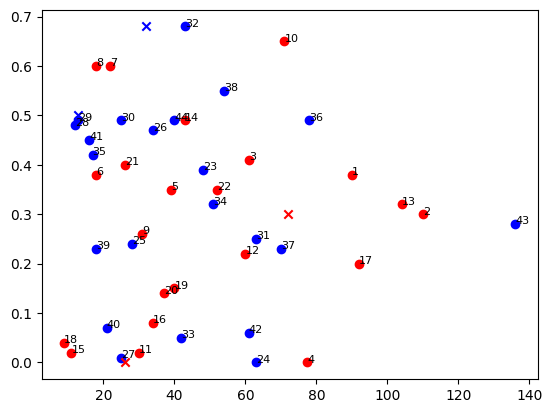

In [83]:
plt.figure()
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], marker='o', color='blue')
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], marker='o', color='red')
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='x', color='blue')
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='x', color='red')

# Add index of each point
for i, txt in enumerate(range(1, len(X_train)+ 1)):
    plt.text(X_train[i, 0] if i < len(X_train) else X_test[i - len(X_train), 0] + 0.01,
             X_train[i, 1] if i < len(X_train) else X_test[i - len(X_train), 1] + 0.01,
             txt, fontsize=8)

plt.show()


#### Atenção: Importante considerar que sem a normalização dos dados, as distâncias são desproporcionais, prejudicando a métrica euclidiana. O eixo X tem peso dominante.

### Treinamento e avaliação dos dados normalizados com 2 features

In [84]:
# Load the data from file
training_data = np.genfromtxt(TRAIN_2F_NORM, delimiter='\t', skip_header=1, usecols=(0,1,2,3))
test_data = np.genfromtxt(TEST_2F_NORM, delimiter='\t', skip_header=1, usecols=(0,1,2,3))

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]    

print("DADOS NORMALIZADOS: 2 FEATURES")
for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS NORMALIZADOS: 2 FEATURES
 Accuracy for k = 1: 0.5
 Accuracy for k = 3: 0.25
 Accuracy for k = 5: 0.75
 Accuracy for k = 7: 1.0


In [85]:
# Discover the k closest neighbors

for i, point in enumerate(X_test):
    print(f"Point: N{i+1}")
    distances, kneighbors = knn.kneighbors([point], K_NEIGHBORS, True)
    for d, n in zip(distances[0], kneighbors[0]):
        print(f"Neighbor: T{n+1} - Distance: {d.round(3)}")

Point: N1
Neighbor: T27 - Distance: 0.017
Neighbor: T11 - Distance: 0.042
Neighbor: T40 - Distance: 0.11
Neighbor: T15 - Distance: 0.122
Neighbor: T16 - Distance: 0.134
Point: N2
Neighbor: T31 - Distance: 0.102
Neighbor: T37 - Distance: 0.104
Neighbor: T12 - Distance: 0.15
Neighbor: T34 - Distance: 0.168
Neighbor: T22 - Distance: 0.174
Point: N3
Neighbor: T29 - Distance: 0.014
Neighbor: T28 - Distance: 0.03
Neighbor: T41 - Distance: 0.077
Neighbor: T30 - Distance: 0.096
Neighbor: T35 - Distance: 0.121
Point: N4
Neighbor: T32 - Distance: 0.087
Neighbor: T7 - Distance: 0.142
Neighbor: T8 - Distance: 0.161
Neighbor: T38 - Distance: 0.258
Neighbor: T30 - Distance: 0.284


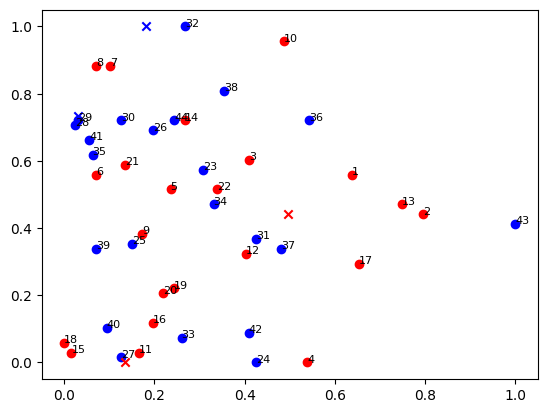

In [86]:
plt.figure()
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], marker='o', color='blue')
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], marker='o', color='red')
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='x', color='blue')
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='x', color='red')

# Add index of each point
for i, txt in enumerate(range(1, len(X_train)+ 1)):
    plt.text(X_train[i, 0] if i < len(X_train) else X_test[i - len(X_train), 0] + 0.01,
             X_train[i, 1] if i < len(X_train) else X_test[i - len(X_train), 1] + 0.01,
             txt, fontsize=8)

plt.show()


### Treinamento e avaliação dos dados originais com 11 features

In [87]:
print("DADOS ORIGINAIS: 11 FEATURES")

# Load the data from file
training_data = np.genfromtxt(TRAIN_11F_ORI, delimiter='\t', skip_header=1)
test_data = np.genfromtxt(TEST_11F_ORI, delimiter='\t', skip_header=1)

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]

for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS ORIGINAIS: 11 FEATURES
 Accuracy for k = 1: 0.5
 Accuracy for k = 3: 0.25
 Accuracy for k = 5: 0.25
 Accuracy for k = 7: 0.5


In [88]:
# Discover the k closest neighbors

for i, point in enumerate(X_test):
    print(f"Point: N{i+1}")
    distances, kneighbors = knn.kneighbors([point], K_NEIGHBORS, True)
    for d, n in zip(distances[0], kneighbors[0]):
        print(f"Neighbor: T{n+1} - Distance: {d.round(3)}")

Point: N1
Neighbor: T11 - Distance: 5.124
Neighbor: T40 - Distance: 5.524
Neighbor: T25 - Distance: 5.638
Neighbor: T27 - Distance: 6.176
Neighbor: T21 - Distance: 6.612
Point: N2
Neighbor: T31 - Distance: 10.896
Neighbor: T24 - Distance: 13.057
Neighbor: T42 - Distance: 13.816
Neighbor: T12 - Distance: 14.436
Neighbor: T36 - Distance: 16.561
Point: N3
Neighbor: T29 - Distance: 1.519
Neighbor: T28 - Distance: 2.232
Neighbor: T41 - Distance: 3.395
Neighbor: T15 - Distance: 5.176
Neighbor: T35 - Distance: 5.421
Point: N4
Neighbor: T11 - Distance: 4.701
Neighbor: T16 - Distance: 4.738
Neighbor: T9 - Distance: 5.183
Neighbor: T20 - Distance: 5.574
Neighbor: T25 - Distance: 5.732


### Treinamento e avaliação dos dados normalizados com 11 features

In [89]:
print("DADOS NORMALIZADOS: 11 FEATURES")

# Load the data from file
training_data = np.genfromtxt(TRAIN_11F_NORM, delimiter='\t', skip_header=1)
test_data = np.genfromtxt(TEST_11F_NORM, delimiter='\t', skip_header=1)

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]

for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS NORMALIZADOS: 11 FEATURES
 Accuracy for k = 1: 0.75
 Accuracy for k = 3: 0.75
 Accuracy for k = 5: 0.75
 Accuracy for k = 7: 0.75


In [90]:
# Discover the k closest neighbors

for i, point in enumerate(X_test):
    print(f"Point: N{i+1}")
    distances, kneighbors = knn.kneighbors([point], K_NEIGHBORS, True)
    for d, n in zip(distances[0], kneighbors[0]):
        print(f"Neighbor: T{n+1} - Distance: {d.round(3)}")

Point: N1
Neighbor: T16 - Distance: 0.266
Neighbor: T27 - Distance: 0.275
Neighbor: T19 - Distance: 0.41
Neighbor: T20 - Distance: 0.447
Neighbor: T15 - Distance: 0.451
Point: N2
Neighbor: T31 - Distance: 0.298
Neighbor: T5 - Distance: 0.522
Neighbor: T22 - Distance: 0.55
Neighbor: T19 - Distance: 0.569
Neighbor: T34 - Distance: 0.574
Point: N3
Neighbor: T26 - Distance: 0.303
Neighbor: T28 - Distance: 0.386
Neighbor: T7 - Distance: 0.469
Neighbor: T29 - Distance: 0.494
Neighbor: T41 - Distance: 0.516
Point: N4
Neighbor: T30 - Distance: 1.924
Neighbor: T1 - Distance: 2.045
Neighbor: T8 - Distance: 2.047
Neighbor: T7 - Distance: 2.462
Neighbor: T6 - Distance: 2.498
